In [1]:
import sys
 
sys.path.append('..')
from piece import piece

piece.start(should_send_to_score=True)

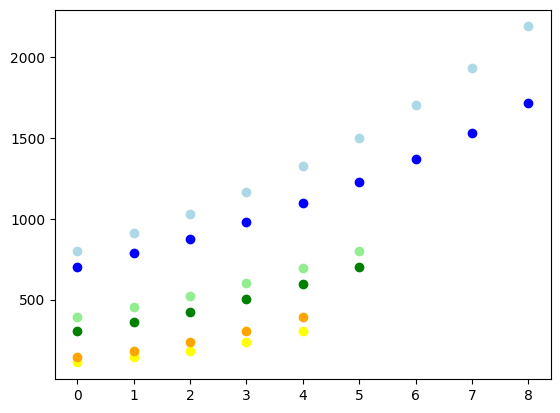

End time 464.8958758312604?
End time 468.5299788017066?
End time 464.45327669695257?
End time 464.36471215508317?
End time 466.1524920289995?


In [2]:
from soundmining_tools.supercollider_receiver import ExtendedNoteHandler, PatchArguments
from soundmining_tools.supercollider_client import SupercolliderClient
from soundmining_tools import note, spectrum
from soundmining_tools.generative import *
from soundmining_tools.sieve import *
from soundmining_tools.modular.control_instruments import ControlInstrument
from soundmining_tools.modular.instrument import NodeId
import math
from typing import Callable
import matplotlib.pyplot as plot
from soundmining_tools.sequencer import Sequencer, SequenceNote
from enum import Enum
from soundmining_tools import supercollider_client
from soundmining_tools.modular import instrument

piece.reset()
piece.synth_player.start()

if piece.synth_player.should_send_to_score:
    score = piece.synth_player.supercollider_score
    score.add_message(supercollider_client.group_head(0, instrument.NodeId.SOURCE.value))
    score.add_message(supercollider_client.group_tail(NodeId.SOURCE.value, NodeId.EFFECT.value))
    score.add_message(supercollider_client.group_tail(NodeId.EFFECT.value, NodeId.ROOM_EFFECT.value))
    score.add_message(supercollider_client.load_dir(instrument.DEFAULT_SYNTH_DIR))

def make_amp_values(sieve: Sieve, value_func: Callable[[int], float]) -> list[float]:
    return [value_func(i) if sieve.is_sieve(i) else 0.0 for i in range(15)]

fundamental_note = "a2"
first_partial_note = "fiss3"
fundamental = note.note_to_hertz(fundamental_note)
first_partial = note.note_to_hertz(first_partial_note)
fact = spectrum.make_fact(fundamental, first_partial)
spect = spectrum.make_spectrum(fundamental, fact, 15)
fact2 = spectrum.make_fact(spect[1], spect[2])
spect2 = spectrum.make_spectrum(spect[1], fact2, 15)

sieve1 = SimpleSieve(4, 0)
sieve2 = SimpleSieve(3, 0)
amp_values1 = lambda i: 1.0 / (i + 1.0)
amp_values2 = lambda i: 1.0 / ((i +1) * math.pi)
amp_values3 = lambda i: 4.0 / math.pow((i + 1.0) * math.pi, 2)
phases = [0 for i in range(15)]

spect_facts = [spect[i + 1] / spect[i] for i in range(len(spect) - 1)]

first_fact = spect[1] / spect[0]
second_fact = spect[2] / spect[1]
third_fact = spect[3] / spect[2]
fourth_fact = spect[4] / spect[3]
fifth_fact = spect[5] / spect[4]
sixth_fact = spect[6] / spect[5]


scale_facts = [
    spect_facts[2], spect_facts[2], spect_facts[2], spect_facts[2],
    spect_facts[4], spect_facts[4], spect_facts[4], spect_facts[4], spect_facts[4],
    spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7],
    ]

scale = [fundamental]
for f in scale_facts:
    scale.append(scale[-1] * f)


low_facts = [
    spect_facts[2], spect_facts[2], spect_facts[2], spect_facts[2]
]
low_scale = [fundamental]
for f in low_facts:
    low_scale.append(low_scale[-1] * f)

third_low_facts = [
    spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5]
]
third_low_scale = [fundamental - ((fundamental * spect_facts[2]) - fundamental)]
for f in third_low_facts:
    third_low_scale.append(third_low_scale[-1] * f)

middle_facts = [
    spect_facts[4], spect_facts[4], spect_facts[4], spect_facts[4], spect_facts[4],
]
middle_scale = [low_scale[-1]]
for f in middle_facts:
    middle_scale.append(middle_scale[-1] * f)


high_facts = [
    spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7] 
]
high_scale = [middle_scale[-1]]
for f in high_facts:
    high_scale.append(high_scale[-1] * f)


bridge_low_facts = [
    spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5]
]
bridge_low_scale = [low_scale[2]]
for f in bridge_low_facts:
    bridge_low_scale.append(bridge_low_scale[-1] * f)


second_low_facts = [
    spect_facts[3], spect_facts[3], spect_facts[3], spect_facts[3]
]
second_low_scale = [low_scale[1]]
for f in low_facts:
    second_low_scale.append(second_low_scale[-1] * f)


second_middle_facts = [
    spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5], spect_facts[5],
]
second_middle_scale = [second_low_scale[-1]]
for f in second_middle_facts:
    second_middle_scale.append(second_middle_scale[-1] * f)

third_middle_facts = [
    spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7]
]
third_middle_scale = [third_low_scale[-1] * spect_facts[5]]
for f in third_middle_facts:
    third_middle_scale.append(third_middle_scale[-1] * f)

second_high_facts = [
    spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[6], spect_facts[6] 
]
second_high_scale = [second_middle_scale[-1]]
for f in second_high_facts:
    second_high_scale.append(second_high_scale[-1] * f)

third_high_facts = [
    spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[7], spect_facts[8], spect_facts[8], spect_facts[8], spect_facts[6], spect_facts[6], spect_facts[6]
]
third_high_scale = [third_middle_scale[-1] * spect_facts[4]]
for f in third_high_facts:
    third_high_scale.append(third_high_scale[-1] * f)

low_transition_matrix = {
    0: {1: 0.4, 2: 0.3, 3: 0.3},
    1: {0: 0.3, 2: 0.3, 3: 0.4},
    2: {0: 0.4, 1: 0.3, 3: 0.3},
    3: {0: 0.3, 1: 0.3, 2: 0.4}
}
low_markov_chain = MarkovChain(low_transition_matrix, 0)
low_ring_markov_chain = MarkovChain(low_transition_matrix, 0)

middle_transition_matrix = {
    0: {1: 0.2, 2: 0.2, 3: 0.3, 4: 0.3},
    1: {0: 0.3, 2: 0.3, 3: 0.1, 4: 0.3},
    2: {0: 0.2, 1: 0.3, 3: 0.3, 4: 0.2},
    3: {0: 0.3, 1: 0.2, 2: 0.3, 4: 0.2},
    4: {0: 0.2, 1: 0.3, 2: 0.2, 3: 0.3}
}
middle_markov_chain = MarkovChain(middle_transition_matrix, 0)
middle_ring_markov_chain = MarkovChain(middle_transition_matrix, 0)

high_transition_matrix = {
    0: {1: 0.3, 2: 0.2, 3: 0.4, 4: 0.2, 5: 0.4, 6: 0.2, 7: 0.2},
    1: {0: 0.2, 2: 0.4, 3: 0.2, 4: 0.3, 5: 0.2, 6: 0.4, 7: 0.3},
    2: {0: 0.3, 1: 0.2, 3: 0.3, 4: 0.2, 5: 0.3, 6: 0.2, 7: 0.4},
    3: {0: 0.2, 1: 0.3, 2: 0.2, 4: 0.3, 5: 0.2, 6: 0.3, 7: 0.2},
    4: {0: 0.3, 1: 0.2, 2: 0.4, 3: 0.4, 5: 0.2, 6: 0.2, 7: 0.3},
    5: {0: 0.2, 1: 0.2, 2: 0.3, 3: 0.2, 4: 0.3, 6: 0.2, 7: 0.4},
    6: {0: 0.4, 1: 0.3, 2: 0.2, 3: 0.3, 4: 0.2, 5: 0.3, 7: 0.2},
    7: {0: 0.2, 1: 0.3, 2: 0.2, 3: 0.2, 4: 0.3, 5: 0.4, 6: 0.3},
}
high_markov_chain = MarkovChain(high_transition_matrix, 0)
high_ring_markov_chain = MarkovChain(high_transition_matrix, 0)

bridge_low_chords = {
    "one": [0, 1, 2, 5, 6],
    "two": [0, 1, 3, 4, 6],
    "three": [2, 3, 4, 5, 7],
    "four": [0, 1, 4, 5, 7]
}
    
bridge_low_note_transition_matrix = {
    "one": {"two": 0.33, "three": 0.33, "four": 0.33},
    "two": {"one": 0.33, "three": 0.33, "four": 0.33},
    "three": {"one": 0.33, "two": 0.33, "four": 0.33},
    "four": {"one": 0.33, "two": 0.33, "three": 0.33},
}
bridge_low_note_markov_chain = MarkovChain(bridge_low_note_transition_matrix, "one")
bridge_low_note_ring_transition_matrix = {
    0: {1: 0.3, 2: 0.2, 3: 0.4, 4: 0.2, 5: 0.4, 6: 0.2, 7: 0.2},
    1: {0: 0.2, 2: 0.4, 3: 0.2, 4: 0.3, 5: 0.2, 6: 0.4, 7: 0.3},
    2: {0: 0.3, 1: 0.2, 3: 0.3, 4: 0.2, 5: 0.3, 6: 0.2, 7: 0.4},
    3: {0: 0.2, 1: 0.3, 2: 0.2, 4: 0.3, 5: 0.2, 6: 0.3, 7: 0.2},
    4: {0: 0.3, 1: 0.2, 2: 0.4, 3: 0.4, 5: 0.2, 6: 0.2, 7: 0.3},
    5: {0: 0.2, 1: 0.2, 2: 0.3, 3: 0.2, 4: 0.3, 6: 0.2, 7: 0.4},
    6: {0: 0.4, 1: 0.3, 2: 0.2, 3: 0.3, 4: 0.2, 5: 0.3, 7: 0.2},
    7: {0: 0.2, 1: 0.3, 2: 0.2, 3: 0.2, 4: 0.3, 5: 0.4, 6: 0.3},
}
bride_low_note_ring_markov_chain = MarkovChain(bridge_low_note_ring_transition_matrix, 0)

fig, ax = plot.subplots()
ax.scatter(range(0, len(low_scale)), low_scale, c="yellow")
ax.scatter(range(0, len(second_low_scale)), second_low_scale, c="orange")
ax.scatter(range(0, len(middle_scale)), middle_scale, c="green")
ax.scatter(range(0, len(second_middle_scale)), second_middle_scale, c="lightgreen")
ax.scatter(range(0, len(high_scale)), high_scale, c="blue")
ax.scatter(range(0, len(second_high_scale)), second_high_scale, c="lightblue")
#ax.scatter(range(0, len(bridge_low_scale)), bridge_low_scale, c="red")

plot.show()

class NoteLen(Enum):
    SHORT = 1
    MIDDLE = 2
    LONG = 3

class NoteTimbre(Enum):
    PLAIN = 1
    RING = 2

timbre_transition_matrix = {
    NoteTimbre.PLAIN: {NoteTimbre.PLAIN: 0.4, NoteTimbre.RING: 0.6},
    NoteTimbre.RING: {NoteTimbre.PLAIN: 0.6, NoteTimbre.RING: 0.4}
}

bridge_low_note_timbre = MarkovChain(timbre_transition_matrix, NoteTimbre.PLAIN)
high_note_timbre = MarkovChain(timbre_transition_matrix, NoteTimbre.PLAIN)
low_note_timbre = MarkovChain(timbre_transition_matrix, NoteTimbre.PLAIN)
middle_note_timbre = MarkovChain(timbre_transition_matrix, NoteTimbre.PLAIN)

def short_perc_control(peak_value: float) -> ControlInstrument:
    attack = random_range(0.03, 0.06)
    decay = 1.0 - attack
    return piece.control_instruments.two_block_control((0.00001, peak_value, 0.00001), (attack, decay), (3, -3))

def perc_control(peak_value: float) -> ControlInstrument:
    attack = random_range(0.1, 0.2)
    decay = 1.0 - attack
    return piece.control_instruments.two_block_control((0.00001, peak_value, 0.00001), (attack, decay), (1, -1))

def reverse_perc_control(peak_value: float) -> ControlInstrument:
    attack = random_range(0.7, 0.8)
    decay = 1.0 - attack
    return piece.control_instruments.two_block_control((0.00001, peak_value, 0.00001), (attack, decay), (1, -1))

#EFFECT_LENGTH = 30
#EFFECT_LENGTH = 21 * 5
#EFFECT_LENGTH = 34 * 5
EFFECT_LENGTH = 470


effect_low = piece.synth_player.note(NodeId.EFFECT) \
    .stereo_input()
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_low) \
    .stereo_high_pass_filter(piece.control_instruments.static_control(600)) \
    .stereo_low_pass_filter(piece.control_instruments.static_control(1000)) \
    .stereo_volume(piece.control_instruments.static_control(0.5)) \
    .stereo_g_verb(piece.control_instruments.three_block_control((0, 1, 1, 0), (0.01, 0.90, 0.09), (0, 0, 0)), roomsize=64, revtime=5, damping=0.6, inputbw=0.95, earlyreflevel=0.5, taillevel=0.7) \
    .play(0, EFFECT_LENGTH, output_bus=0)
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_low) \
    .stereo_volume(piece.control_instruments.static_control(0.5)) \
    .play(0, EFFECT_LENGTH, output_bus=2)


effect_low_bridge = piece.synth_player.note(NodeId.EFFECT) \
    .stereo_input()
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_low_bridge) \
    .stereo_high_pass_filter(piece.control_instruments.static_control(100)) \
    .stereo_low_pass_filter(piece.control_instruments.static_control(300)) \
    .stereo_volume(piece.control_instruments.static_control(0.15)) \
    .stereo_g_verb(piece.control_instruments.three_block_control((0, 1, 1, 0), (0.01, 0.90, 0.09), (0, 0, 0)), roomsize=128, revtime=6, damping=0.9, inputbw=1.2, earlyreflevel=0.6, taillevel=0.8) \
    .play(0, EFFECT_LENGTH, output_bus=4)    
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_low_bridge) \
    .stereo_volume(piece.control_instruments.static_control(0.15)) \
    .play(0, EFFECT_LENGTH, output_bus=6)




effect_middle = piece.synth_player.note(NodeId.EFFECT) \
    .stereo_input()
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_middle) \
    .stereo_high_pass_filter(piece.control_instruments.static_control(1500)) \
    .stereo_low_pass_filter(piece.control_instruments.static_control(2500)) \
    .stereo_volume(piece.control_instruments.static_control(0.6)) \
    .stereo_g_verb(piece.control_instruments.three_block_control((0, 1, 1, 0), (0.01, 0.90, 0.09), (0, 0, 0)), roomsize=30, revtime=2.1, damping=0.3, inputbw=0.39, earlyreflevel=0.2, taillevel=0.7) \
    .play(0, EFFECT_LENGTH, output_bus=8)
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_middle) \
    .stereo_volume(piece.control_instruments.static_control(0.4)) \
    .play(0, EFFECT_LENGTH, output_bus=10)


effect_high = piece.synth_player.note(NodeId.EFFECT) \
    .stereo_input()
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_high) \
    .stereo_high_pass_filter(piece.control_instruments.static_control(2500)) \
    .stereo_low_pass_filter(piece.control_instruments.static_control(5500)) \
    .stereo_volume(piece.control_instruments.static_control(0.5)) \
    .stereo_g_verb(piece.control_instruments.three_block_control((0, 1, 1, 0), (0.01, 0.90, 0.09), (0, 0, 0)), roomsize=10, revtime=1.5, damping=0.2, inputbw=0.49, earlyreflevel=0.2, taillevel=0.7) \
    .play(0, EFFECT_LENGTH, output_bus=12)
piece.synth_player.note(NodeId.ROOM_EFFECT) \
    .input_from_note(effect_high) \
    .stereo_volume(piece.control_instruments.static_control(0.5)) \
    .play(0, EFFECT_LENGTH, output_bus=14)

#
# First part notes
#

def play_first_high_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = high_markov_chain.next()
    note_spect = spectrum.make_spectrum(high_scale[played_note], fact, 15)
    volume_control = short_perc_control(amp)
    duration = random_range(0.1, 0.5)
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    amps = make_amp_values(sieve1, amp_values3)
    volume_control = short_perc_control(amp * 2)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)        
    
    volume_control = short_perc_control(amp)
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)
    

def play_first_middle_note(start_time: float) -> None:
    
    played_note = middle_markov_chain.next()
    note_spect = spectrum.make_spectrum(middle_scale[played_note], fact, 15)
    
    duration = random_range(2, 3)
    amps = make_amp_values(sieve1, amp_values3)
    
    amp = random_range(0.15, 0.45)
    volume_control = perc_control(amp * 3)
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(200)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)                   
    
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)
    

def play_first_low_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = low_markov_chain.next()
    note_spect = spectrum.make_spectrum(low_scale[played_note], fact, 15)        
    volume_control = reverse_perc_control(amp * 3)
    duration = random_range(3, 5)
    amps = make_amp_values(sieve1, amp_values3)
    pan = pan_point(ranges=[(-0.25, 0.25)])

    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(70)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)

    volume_control = reverse_perc_control(amp * 3)
    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)

    
def play_first_bridge_low_note(start_time: float, note: int) -> None:
    amp = random_range(0.15, 0.45)              
    played_note = note
    note_spect = spectrum.make_spectrum(bridge_low_scale[played_note], fact, 15)            
    duration = random_range(8, 13)
    amps = make_amp_values(sieve1, amp_values3)
    pan = pan_point(ranges=[(-0.45, 0.45)])

    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    pan = pan_point(ranges=[(-0.45, 0.45)])
    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)

#
# Second part notes
#

def play_second_middle_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = middle_markov_chain.next()    
    note_spect = spectrum.make_spectrum(second_middle_scale[played_note], fact, 15)
    volume_control = perc_control(amp * 5)
    duration = random_range(2, 3)
    amps = make_amp_values(sieve1, amp_values3)
    
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(200)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)
    
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)
 
def play_second_low_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = low_markov_chain.next()
    note_spect = spectrum.make_spectrum(second_low_scale[played_note], fact, 15)        
    volume_control = reverse_perc_control(amp * 3)
    duration = random_range(3, 5)    
    amps = make_amp_values(sieve1, amp_values3)

    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(80)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
    
    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(80)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
    
    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(600)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
        
    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(600)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
    
def play_second_high_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = high_markov_chain.next()
    note_spect = spectrum.make_spectrum(second_high_scale[played_note], fact, 15)
    volume_control = short_perc_control(amp * 3)
    duration = random_range(0.1, 0.5)
    amps = make_amp_values(sieve1, amp_values3)

    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)
          
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)               
    
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)
               
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)
    

def play_second_bridge_low_note(start_time: float, note: int) -> None:
    amp = random_range(0.15, 0.45)     
    played_note = note
    note_spect = spectrum.make_spectrum(bridge_low_scale[played_note], fact, 15)            
    duration = random_range(8, 13)
    amps = make_amp_values(sieve1, amp_values3)
    pan = pan_point(ranges=[(-0.45, 0.45)])

    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)        
    
    pan = pan_point(ranges=[(-0.45, 0.45)])
    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    if bridge_low_note_timbre.next() is NoteTimbre.RING:
        volume_control = piece.control_instruments.sine_control(0, amp * 5)
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low_bridge, start_time, duration)            
        
        pan = pan_point(ranges=[(-0.45, 0.45)])
        volume_control = piece.control_instruments.sine_control(0, amp * 5)
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low_bridge, start_time, duration)
    

#
# Third part notes
#

def play_third_low_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = low_markov_chain.next()
    note_spect = spectrum.make_spectrum(low_scale[played_note], fact, 15)        
    volume_control = reverse_perc_control(amp * 3)
    duration = random_range(3, 5)
    amps = make_amp_values(sieve1, amp_values3)

    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(70)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(70)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)

    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(500)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
    

def play_third_middle_note(start_time: float) -> None:
    
    played_note = middle_markov_chain.next()
    note_spect = spectrum.make_spectrum(middle_scale[played_note], fact, 15)
    
    duration = random_range(2, 3)
    amps = make_amp_values(sieve1, amp_values3)
    
    
    amp = random_range(0.15, 0.45)
    volume_control = perc_control(amp * 3)
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(200)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)           
    pan = pan_point(ranges=[(-0.85, -0.65), (0.65, 0.85)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(200)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[middle_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)
    
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)                      
    pan = pan_point(ranges=[(-0.85, -0.65), (0.65, 0.85)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[middle_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)                      
    

def play_third_high_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = high_markov_chain.next()
    note_spect = spectrum.make_spectrum(high_scale[played_note], fact, 15)
    volume_control = short_perc_control(amp)
    duration = random_range(0.1, 0.5)
    
    amps = make_amp_values(sieve1, amp_values3)
    volume_control = short_perc_control(amp * 2)
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)                                      
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration) 
    
    volume_control = short_perc_control(amp)
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)                            
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)      

def play_third_bridge_low_note(start_time: float, note: int) -> None:
    amp = random_range(0.15, 0.45)                
    played_note = note
    note_spect = spectrum.make_spectrum(bridge_low_scale[played_note], fact, 15)            
    duration = random_range(8, 13)
    amps = make_amp_values(sieve1, amp_values3)
    pan = pan_point(ranges=[(-0.45, 0.45)])

    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    pan = pan_point(ranges=[(-0.45, 0.45)])
    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    if bridge_low_note_timbre.next() is NoteTimbre.RING:
        volume_control = piece.control_instruments.sine_control(0, amp * 5)
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low_bridge, start_time, duration)
        
        pan = pan_point(ranges=[(-0.45, 0.45)])
        volume_control = piece.control_instruments.sine_control(0, amp * 5)
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low_bridge, start_time, duration)
        
def play_third_bridge_first_high_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = high_markov_chain.next()
    note_spect = spectrum.make_spectrum(high_scale[played_note], fact, 15)
    volume_control = short_perc_control(amp)
    duration = random_range(0.1, 0.5)
    
    amps = make_amp_values(sieve1, amp_values3)

    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)                            
    
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration) 

    if high_note_timbre.next() is NoteTimbre.RING:
        pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_high, start_time, duration)     
    
        pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_high, start_time, duration)
    

def play_third_bridge_second_high_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = high_markov_chain.next()
    note_spect = spectrum.make_spectrum(second_high_scale[played_note], fact, 15)
    volume_control = short_perc_control(amp * 3)
    duration = random_range(0.1, 0.5)
    amps = make_amp_values(sieve1, amp_values3)

    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)         
    
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)

    if high_note_timbre.next() is NoteTimbre.RING:
        pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_high, start_time, duration)
        
        pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_high, start_time, duration)          


#
# Fourth part notes
#

fourth_middle_note_len_matrix = {
    NoteLen.LONG: {NoteLen.LONG: 0.1, NoteLen.MIDDLE: 0.30, NoteLen.SHORT: 0.60},
    NoteLen.SHORT: {NoteLen.LONG: 0.20, NoteLen.MIDDLE: 0.2, NoteLen.SHORT: 0.60},
    NoteLen.MIDDLE: {NoteLen.LONG: 0.20, NoteLen.MIDDLE: 0.20, NoteLen.SHORT: 0.60}
}
fourth_middle_note_len_markov_chain = MarkovChain(fourth_middle_note_len_matrix, NoteLen.MIDDLE)

fourth_low_note_len_matrix = {
    NoteLen.LONG: {NoteLen.LONG: 0.1, NoteLen.MIDDLE: 0.20, NoteLen.SHORT: 0.70},
    NoteLen.SHORT: {NoteLen.LONG: 0.30, NoteLen.MIDDLE: 0.1, NoteLen.SHORT: 0.60},
    NoteLen.MIDDLE: {NoteLen.LONG: 0.20, NoteLen.MIDDLE: 0.10, NoteLen.SHORT: 0.70}
}
fourth_low_note_len_markov_chain = MarkovChain(fourth_low_note_len_matrix, NoteLen.LONG)

fourth_high_note_len_matrix = {
    NoteLen.LONG: {NoteLen.LONG: 0.1, NoteLen.MIDDLE: 0.20, NoteLen.SHORT: 0.70},
    NoteLen.SHORT: {NoteLen.LONG: 0.30, NoteLen.MIDDLE: 0.1, NoteLen.SHORT: 0.60},
    NoteLen.MIDDLE: {NoteLen.LONG: 0.20, NoteLen.MIDDLE: 0.10, NoteLen.SHORT: 0.70}
}
fourth_high_note_len_markov_chain = MarkovChain(fourth_high_note_len_matrix, NoteLen.LONG)

def play_fourth_low_notes(start: float) -> None:
    current_time = start
    for i in range(0, random_int_range(3, 7)):
        amp = random_range(0.15, 0.45) * 3       
        played_note = low_markov_chain.next()
        note_spect = spectrum.make_spectrum(third_low_scale[played_note], fact, 15)        

        match fourth_low_note_len_markov_chain.next():
            case NoteLen.SHORT:
                volume_control = short_perc_control(amp)
                duration = random_range(0.2, 0.9)
            case NoteLen.MIDDLE:
                volume_control = perc_control(amp)
                duration = random_range(2, 3)
            case NoteLen.LONG:
                volume_control = reverse_perc_control(amp)
                duration = random_range(3, 5)
        
        amps = make_amp_values(sieve1, amp_values3)
        
        pan = pan_point(ranges=[(-0.25, 0.25)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(70)) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low, current_time, duration)
        
        pan = pan_point(ranges=[(-0.25, 0.25)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(500)) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low, current_time, duration)
        
        if low_note_timbre.next() is NoteTimbre.RING:
            pan = pan_point(ranges=[(-0.25, 0.25)])
            piece.synth_player.note() \
                .bank_of_osc(note_spect, amps, phases) \
                .mono_low_pass_filter(piece.control_instruments.static_control(70)) \
                .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
                .mono_volume(volume_control) \
                .pan(piece.control_instruments.static_control(pan)) \
                .send_to_synth_note(effect_low, current_time, duration)
            
            pan = pan_point(ranges=[(-0.25, 0.25)])
            piece.synth_player.note() \
                .bank_of_osc(note_spect, amps, phases) \
                .mono_high_pass_filter(piece.control_instruments.static_control(500)) \
                .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
                .mono_volume(volume_control) \
                .pan(piece.control_instruments.static_control(pan)) \
                .send_to_synth_note(effect_low, current_time, duration)
        
        
        current_time = current_time + (duration * random_range(0.85, 1.15))


def play_fourth_middle_notes(start: float) -> None:
    current_time = start
    for i in range(0, random_int_range(3, 7)):
        amp = random_range(0.15, 0.45) * 3
        played_note = middle_markov_chain.next()            
        note_spect = spectrum.make_spectrum(third_middle_scale[played_note], fact, 15)
        
        match fourth_middle_note_len_markov_chain.next():
            case NoteLen.SHORT:
                volume_control = short_perc_control(amp)
                duration = random_range(0.2, 0.9)
            case NoteLen.MIDDLE:
                volume_control = perc_control(amp)
                duration = random_range(2, 3)
            case NoteLen.LONG:
                volume_control = reverse_perc_control(amp)
                duration = random_range(3, 5)
        
        amps = make_amp_values(sieve1, amp_values3)

        pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(200)) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_middle, current_time, duration) 
        
        pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_middle, current_time, duration) 
        
        if middle_note_timbre.next() is NoteTimbre.RING:
            pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
            piece.synth_player.note() \
                .bank_of_osc(note_spect, amps, phases) \
                .mono_low_pass_filter(piece.control_instruments.static_control(200)) \
                .ring_modulate(piece.control_instruments.static_control(note_spect[middle_ring_markov_chain.next()])) \
                .mono_volume(volume_control) \
                .pan(piece.control_instruments.static_control(pan)) \
                .send_to_synth_note(effect_middle, current_time, duration) 
            
            pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
            piece.synth_player.note() \
                .bank_of_osc(note_spect, amps, phases) \
                .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
                .ring_modulate(piece.control_instruments.static_control(note_spect[middle_ring_markov_chain.next()])) \
                .mono_volume(volume_control) \
                .pan(piece.control_instruments.static_control(pan)) \
                .send_to_synth_note(effect_middle, current_time, duration) 

        current_time = current_time + (duration * random_range(0.85, 1.15))

def play_fourth_high_notes(start: float) -> None:
    current_time = start
    for i in range(0, random_int_range(3, 7)):
        amp = random_range(0.15, 0.45) * 2
        played_note = high_markov_chain.next()        
        note_spect = spectrum.make_spectrum(third_high_scale[played_note], fact, 15)

        match fourth_high_note_len_markov_chain.next():
            case NoteLen.SHORT:
                volume_control = short_perc_control(amp)
                duration = random_range(0.2, 0.9)
            case NoteLen.MIDDLE:
                volume_control = perc_control(amp)
                duration = random_range(2, 3)
            case NoteLen.LONG:
                volume_control = reverse_perc_control(amp)
                duration = random_range(3, 5)

        amps = make_amp_values(sieve1, amp_values3)
        
        pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_high, current_time, duration)
        
        pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_high, current_time, duration)
        
        if high_note_timbre.next() is NoteTimbre.RING:
            pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
            piece.synth_player.note() \
                .bank_of_osc(note_spect, amps, phases) \
                .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
                .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
                .mono_volume(volume_control) \
                .pan(piece.control_instruments.static_control(pan)) \
                .send_to_synth_note(effect_high, current_time, duration)
            
            pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
            piece.synth_player.note() \
                .bank_of_osc(note_spect, amps, phases) \
                .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
                .ring_modulate(piece.control_instruments.static_control(note_spect[high_ring_markov_chain.next()])) \
                .mono_volume(volume_control) \
                .pan(piece.control_instruments.static_control(pan)) \
                .send_to_synth_note(effect_high, current_time, duration)
        
        current_time = current_time + (duration * random_range(0.85, 1.15))


def play_fourth_bridge_low_note(start_time: float, note: int) -> None:
    amp = random_range(0.15, 0.45)                
    played_note = note
    note_spect = spectrum.make_spectrum(bridge_low_scale[played_note], fact, 15)            
    duration = random_range(8, 13)
    amps = make_amp_values(sieve1, amp_values3)
    pan = pan_point(ranges=[(-0.45, 0.45)])

    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    pan = pan_point(ranges=[(-0.45, 0.45)])
    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    if bridge_low_note_timbre.next() is NoteTimbre.RING:
        volume_control = piece.control_instruments.sine_control(0, amp * 5)
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low_bridge, start_time, duration)
        
        pan = pan_point(ranges=[(-0.45, 0.45)])
        volume_control = piece.control_instruments.sine_control(0, amp * 5)
        piece.synth_player.note() \
            .bank_of_osc(note_spect, amps, phases) \
            .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
            .ring_modulate(piece.control_instruments.static_control(note_spect[low_ring_markov_chain.next()])) \
            .mono_volume(volume_control) \
            .pan(piece.control_instruments.static_control(pan)) \
            .send_to_synth_note(effect_low_bridge, start_time, duration)


#
# Fifth part notes
#
def play_fifth_middle_note(start_time: float) -> None:
    played_note = middle_markov_chain.next()
    note_spect = spectrum.make_spectrum(middle_scale[played_note], fact, 15)
    
    duration = random_range(2, 3)
    amps = make_amp_values(sieve1, amp_values3)
    
    amp = random_range(0.15, 0.45)
    volume_control = perc_control(amp * 3)
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(200)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)                      
    
    pan = pan_point(ranges=[(-0.75, -0.5), (0.5, 0.75)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_middle, start_time, duration)
    

def play_fifth_low_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = low_markov_chain.next()
    note_spect = spectrum.make_spectrum(low_scale[played_note], fact, 15)        
    volume_control = reverse_perc_control(amp * 3)
    duration = random_range(3, 5)
    amps = make_amp_values(sieve1, amp_values3)
    pan = pan_point(ranges=[(-0.25, 0.25)])

    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(70)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)

    volume_control = reverse_perc_control(amp * 3)
    pan = pan_point(ranges=[(-0.25, 0.25)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low, start_time, duration)
    

def play_fifth_high_note(start_time: float) -> None:
    amp = random_range(0.15, 0.45)
    played_note = high_markov_chain.next()
    note_spect = spectrum.make_spectrum(high_scale[played_note], fact, 15)
    volume_control = short_perc_control(amp)
    duration = random_range(0.1, 0.5)
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    amps = make_amp_values(sieve1, amp_values3)
    volume_control = short_perc_control(amp * 2)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(500)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)
    
    volume_control = short_perc_control(amp)
    pan = pan_point(ranges=[(-0.99, -0.75), (0.75, 0.99)])
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(2000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_high, start_time, duration)

def play_fifth_bridge_low_note(start_time: float, note: int) -> None:
    amp = random_range(0.15, 0.45)              
    played_note = note
    note_spect = spectrum.make_spectrum(bridge_low_scale[played_note], fact, 15)            
    duration = random_range(8, 13)
    amps = make_amp_values(sieve1, amp_values3)
    pan = pan_point(ranges=[(-0.45, 0.45)])

    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_low_pass_filter(piece.control_instruments.static_control(75)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    pan = pan_point(ranges=[(-0.45, 0.45)])
    volume_control = piece.control_instruments.sine_control(0, amp * 5)
    piece.synth_player.note() \
        .bank_of_osc(note_spect, amps, phases) \
        .mono_high_pass_filter(piece.control_instruments.static_control(1000)) \
        .mono_volume(volume_control) \
        .pan(piece.control_instruments.static_control(pan)) \
        .send_to_synth_note(effect_low_bridge, start_time, duration)
    
    print(f"End time {start_time + duration}?")
    
    
class NoteHandler(ExtendedNoteHandler):
    def __init__(self, client: SupercolliderClient) -> None:
        super().__init__(client)        

    def handle_note(self, patch_arguments: PatchArguments) -> None:
        match patch_arguments.octave:
            case 2:
                play_first_low_note(patch_arguments.start)                
            case 3:
                play_first_middle_note(patch_arguments.start)                
            case 4:
                play_first_high_note(patch_arguments.start)
            case 5:
                for note in bridge_low_chords[bridge_low_note_markov_chain.next()]:
                    play_first_bridge_low_note(patch_arguments.start + (2 * random_range(0.8, 1.2)), note)
            
my_handler = NoteHandler(piece.supercollider_client)
piece.receiver.set_note_handler(my_handler)                    

class PlayNote(Enum):
    LOW = 1
    HIGH = 2
    BOTH = 3
    NONE = 4

play_low_note_matrix = {
    True: {True: 0.25, False: 0.75},
    False: {True: 0.75, False: 0.25}
}

play_low_note_markov_chain = MarkovChain(play_low_note_matrix, False)

play_note_matrix = {
    PlayNote.LOW: {PlayNote.LOW: 0.1, PlayNote.HIGH: 0.20, PlayNote.NONE: 0.70},
    PlayNote.HIGH: {PlayNote.LOW: 0.20, PlayNote.HIGH: 0.1, PlayNote.NONE: 0.70},
    PlayNote.NONE: {PlayNote.LOW: 0.30, PlayNote.HIGH: 0.30, PlayNote.NONE: 0.40}
}

play_note_markov_chain = MarkovChain(play_note_matrix, PlayNote.NONE)

middle_time_transition_matrix = {
    3: {3: 0.7, 5: 0.3},
    5: {3: 0.9, 5: 0.1}
}
middle_time_markov_chain = MarkovChain(middle_time_transition_matrix, 5)

bridge_time_transition_matrix = {
    8: {8: 0.7, 13: 0.3},
    13: {8: 0.9, 13: 0.1}
}
bridge_time_markov_chain = MarkovChain(bridge_time_transition_matrix, 8)

nr_of_first_middle_notes = 21
nr_of_second_middle_notes = 13
nr_of_third_middle_notes = 8


def fifth_bridge_low_note_step_handler(i: int, time: float) -> list[SequenceNote]:
    for note in bridge_low_chords[bridge_low_note_markov_chain.next()]:
        play_fifth_bridge_low_note(time + (2 * random_range(0.8, 1.2)), note)

fifth_bridge_low_note_sequencer = Sequencer(1) \
    .add_step_handler(fifth_bridge_low_note_step_handler) \
    .next_time_handler(lambda i: 1)

def fifth_middle_step_handler(i: int, time: float) -> list[SequenceNote]:
    duration = play_fifth_middle_note(time)
    match(play_note_markov_chain.next()):
        case PlayNote.LOW:
            play_fifth_low_note(time + (1 * random_range(1.0, 1.3)))            
        case PlayNote.HIGH:
            play_fifth_high_note(time + (1 * random_range(1.0, 1.3)))            
    return []

fifth_middle_note_sequencer = Sequencer(8) \
    .add_step_handler(fifth_middle_step_handler) \
    .start_time_handler(lambda start_time: start_time + (8 * random_range(0.85, 1.15))) \
    .next_time_handler(lambda i: middle_time_markov_chain.next() * random_range(0.85, 1.15)) \
    .spawn_sequencer(7, fifth_bridge_low_note_sequencer)    

def fourth_bridge_low_note_step_handler(i: int, time: float) -> list[SequenceNote]:
    for note in bridge_low_chords[bridge_low_note_markov_chain.next()]:
        play_fourth_bridge_low_note(time + (2 * random_range(0.8, 1.2)), note)

fourth_bridge_low_note_sequencer = Sequencer(3) \
    .add_step_handler(fourth_bridge_low_note_step_handler) \
    .next_time_handler(lambda i: bridge_time_markov_chain.next() * random_range(0.85, 1.15)) \
    .spawn_sequencer(2, fifth_middle_note_sequencer)

def fourth_part_high_step_handler(i: int, time: float) -> list[SequenceNote]:
    play_fourth_high_notes(time)

fourth_part_high_sequencer = Sequencer(8) \
    .add_step_handler(fourth_part_high_step_handler) \
    .start_time_handler(lambda start_time: start_time + (8 * random_range(0.85, 1.15))) \
    .next_time_handler(lambda i: 13 * random_range(0.85, 1.15)) \
    .spawn_sequencer(7, fourth_bridge_low_note_sequencer)


def fourth_part_low_step_handler(i: int, time: float) -> list[SequenceNote]:
    play_fourth_low_notes(time)

fourth_part_low_sequencer = Sequencer(8) \
    .add_step_handler(fourth_part_low_step_handler) \
    .start_time_handler(lambda start_time: start_time + (8 * random_range(0.85, 1.15))) \
    .next_time_handler(lambda i: 13 * random_range(0.85, 1.15)) \
    .spawn_sequencer(0, fourth_part_high_sequencer)


def fourth_part_middle_step_handler(i: int, time: float) -> list[SequenceNote]:
    play_fourth_middle_notes(time)

fourth_part_middle_sequencer = Sequencer(9) \
    .add_step_handler(fourth_part_middle_step_handler) \
    .next_time_handler(lambda i: 13 * random_range(0.85, 1.15)) \
    .spawn_sequencer(0, fourth_part_low_sequencer) \
    .start_time_handler(lambda start_time: start_time + (13 * random_range(0.85, 1.15))) \
    

def third_bridge_high_step_handler(i: int, time: float) -> list[SequenceNote]:
    if i < 13:
        play_third_bridge_first_high_note(time)
    else:
        play_third_bridge_second_high_note(time)
    return []

third_bridge_high_note_sequencer = Sequencer(21) \
    .add_step_handler(third_bridge_high_step_handler) \
    .start_time_handler(lambda start_time: start_time + (8 * random_range(0.85, 1.15))) \
    .next_time_handler(lambda i: middle_time_markov_chain.next() * random_range(0.85, 1.15)) \

def third_bridge_low_note_step_handler(i: int, time: float) -> list[SequenceNote]:
    for note in bridge_low_chords[bridge_low_note_markov_chain.next()]:
        play_third_bridge_low_note(time + (2 * random_range(0.8, 1.2)), note)

third_bridge_low_note_sequencer = Sequencer(13) \
    .add_step_handler(third_bridge_low_note_step_handler) \
    .next_time_handler(lambda i: bridge_time_markov_chain.next() * random_range(0.85, 1.15)) \
    .spawn_sequencer(0, third_bridge_high_note_sequencer) \
    .spawn_sequencer(12, fourth_part_middle_sequencer)    

def third_middle_step_handler(i: int, time: float) -> list[SequenceNote]:
    play_third_middle_note(time)
    match(play_note_markov_chain.next()):
        case PlayNote.LOW:
            play_third_low_note(time + (1 * random_range(1.0, 1.3)))
        case PlayNote.HIGH:
            play_third_high_note(time + (1 * random_range(1.0, 1.3)))
    return []

third_middle_note_sequencer = Sequencer(nr_of_third_middle_notes) \
    .add_step_handler(third_middle_step_handler) \
    .start_time_handler(lambda start_time: start_time + (8 * random_range(0.85, 1.15))) \
    .next_time_handler(lambda i: middle_time_markov_chain.next() * random_range(0.85, 1.15)) \
    .spawn_sequencer(nr_of_third_middle_notes -1, third_bridge_low_note_sequencer)

def second_bridge_low_note_step_handler(i: int, time: float) -> list[SequenceNote]:
    for note in bridge_low_chords[bridge_low_note_markov_chain.next()]:
        play_second_bridge_low_note(time + (2 * random_range(0.8, 1.2)), note)

second_bridge_low_note_sequencer = Sequencer(1) \
    .add_step_handler(second_bridge_low_note_step_handler) \
    .next_time_handler(lambda i: 1) \
    .spawn_sequencer(0, third_middle_note_sequencer)


def second_middle_note_step_handler(i: int, time: float) -> list[SequenceNote]:
    play_second_middle_note(time)
    match(play_note_markov_chain.next()):
        case PlayNote.LOW:
            play_second_low_note(time + (1 * random_range(1.0, 1.3)))
        case PlayNote.HIGH:
            play_second_high_note(time + (1 * random_range(1.0, 1.3)))

second_middle_note_sequencer = Sequencer(nr_of_second_middle_notes) \
    .add_step_handler(second_middle_note_step_handler) \
    .start_time_handler(lambda start_time: start_time + (8 * random_range(0.85, 1.15))) \
    .next_time_handler(lambda i: middle_time_markov_chain.next() * random_range(0.85, 1.15)) \
    .spawn_sequencer(nr_of_second_middle_notes -1, second_bridge_low_note_sequencer)

def first_bridge_low_note_step_handler(i: int, time: float) -> list[SequenceNote]:
    for note in bridge_low_chords[bridge_low_note_markov_chain.next()]:
        play_first_bridge_low_note(time + (2 * random_range(0.8, 1.2)), note)

first_bridge_low_note_sequencer = Sequencer(1) \
    .add_step_handler(first_bridge_low_note_step_handler) \
    .next_time_handler(lambda i: 1) \
    .spawn_sequencer(0, second_middle_note_sequencer)

def first_middle_step_handler(i: int, time: float) -> list[SequenceNote]:
    duration = play_first_middle_note(time)
    match(play_note_markov_chain.next()):
        case PlayNote.LOW:
            play_first_low_note(time + (1 * random_range(1.0, 1.3)))            
        case PlayNote.HIGH:
            play_first_high_note(time + (1 * random_range(1.0, 1.3)))            
    return []


Sequencer(nr_of_first_middle_notes) \
    .add_step_handler(first_middle_step_handler) \
    .next_time_handler(lambda i: middle_time_markov_chain.next() * random_range(0.85, 1.15)) \
    .spawn_sequencer(nr_of_first_middle_notes - 1, first_bridge_low_note_sequencer) \
    .generate(0)

if piece.synth_player.should_send_to_score:
    piece.synth_player.supercollider_score.make_score_file("module-music-7.txt")


In [ ]:
piece.stop()